**Description**: Analyze Mistral-7B zero-shot w/ packing accuracies for $n = 100$.

**Estimated runtime**: 20 min.

In [1]:
import os
import sys
from typing import Literal

import polars as pl
import seaborn as sns

# sys hack to import from grandparent
sys.path.append(os.path.abspath(os.path.join('..', '..')))
import utils

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
num_train: Literal[50, 100] = 100
num_test: Literal[50, 100, 200, 500] = 100

In [3]:
sns.set_theme(style="darkgrid")

# Load data

In [4]:
accuracies_home_dir = os.path.join("..", "..", "accuracies_zero_shot_packing")
accuracy_df = utils.load_all_accuracies(
    os.path.join(accuracies_home_dir, f"m{num_train}"), num_test
)  # for plot
num_correct_df = utils.load_all_num_correct(
    os.path.join(accuracies_home_dir, f"m{num_train}"), num_test
)  # for model

In [5]:
accuracy_df.shape

(500, 8)

In [6]:
equation = "p(num_correct, num_test) ~ method + (1|dataset/method) + (1|dataset/pair)"
id_vars = ("num_test", "pair", "dataset")

# Plot

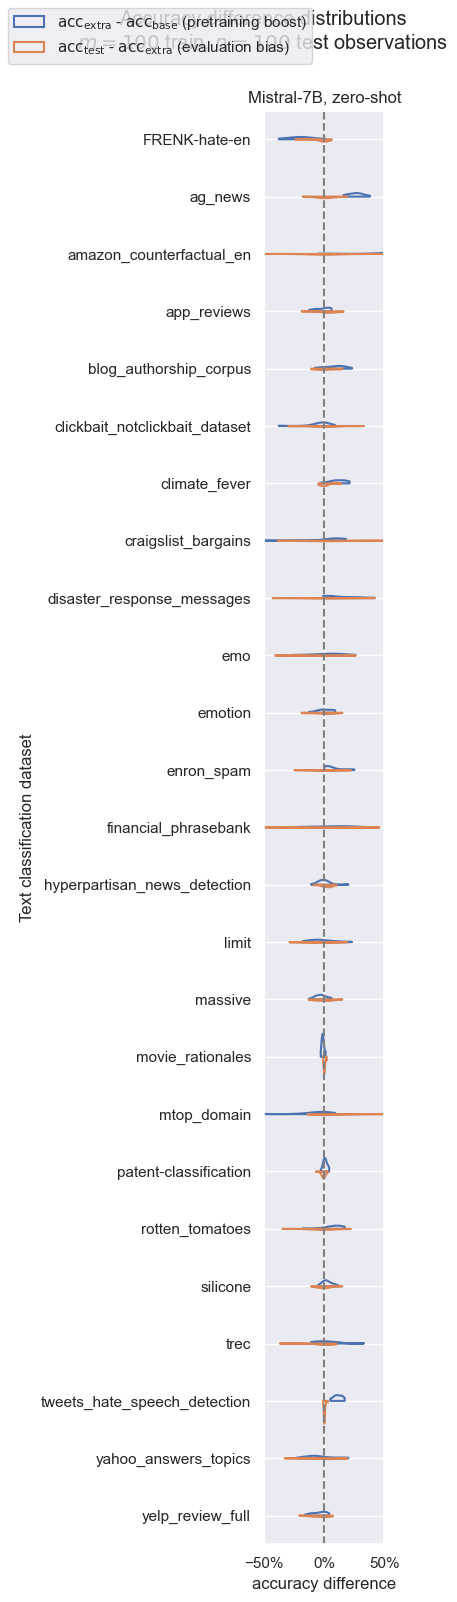

In [7]:
utils.violin_plot_multiple_lms(accuracy_df, num_test, num_train);

# Pretraining boost

In [8]:
summary_boost, summary_relative_boost = utils.eda(
    accuracy_df, treatment="extra", control="base"
)

Overall difference:
┌─────────┬──────────┐
│ mean    ┆ se       │
╞═════════╪══════════╡
│ 0.04398 ┆ 0.027193 │
└─────────┴──────────┘
Overall difference (relative):
┌──────────┬──────────┐
│ mean     ┆ se       │
╞══════════╪══════════╡
│ 0.211204 ┆ 0.108196 │
└──────────┴──────────┘


In [9]:
with pl.Config(tbl_rows=-1):
    print(summary_boost)

┌────────────────────────────────┬─────────┬──────────┐
│ dataset                        ┆ mean    ┆ se       │
╞════════════════════════════════╪═════════╪══════════╡
│ FRENK-hate-en                  ┆ -0.1925 ┆ 0.022791 │
│ ag_news                        ┆ 0.26    ┆ 0.013553 │
│ amazon_counterfactual_en       ┆ 0.563   ┆ 0.047651 │
│ app_reviews                    ┆ -0.013  ┆ 0.0139   │
│ blog_authorship_corpus         ┆ 0.083   ┆ 0.018906 │
│ clickbait_notclickbait_dataset ┆ -0.0325 ┆ 0.020962 │
│ climate_fever                  ┆ 0.1145  ┆ 0.014982 │
│ craigslist_bargains            ┆ 0.0575  ┆ 0.036403 │
│ disaster_response_messages     ┆ 0.1035  ┆ 0.028398 │
│ emo                            ┆ 0.017   ┆ 0.031872 │
│ emotion                        ┆ 0.007   ┆ 0.014347 │
│ enron_spam                     ┆ 0.061   ┆ 0.017425 │
│ financial_phrasebank           ┆ 0.052   ┆ 0.044566 │
│ hyperpartisan_news_detection   ┆ -0.003  ┆ 0.013418 │
│ limit                          ┆ -0.0275 ┆ 0.0

In [10]:
with pl.Config(tbl_rows=-1):
    print(summary_relative_boost)

┌────────────────────────────────┬───────────┬──────────┐
│ dataset                        ┆ mean      ┆ se       │
╞════════════════════════════════╪═══════════╪══════════╡
│ FRENK-hate-en                  ┆ -0.262929 ┆ 0.028693 │
│ ag_news                        ┆ 0.498628  ┆ 0.031002 │
│ amazon_counterfactual_en       ┆ 2.427311  ┆ 0.252477 │
│ app_reviews                    ┆ -0.016857 ┆ 0.021528 │
│ blog_authorship_corpus         ┆ 0.17653   ┆ 0.040495 │
│ clickbait_notclickbait_dataset ┆ -0.043925 ┆ 0.028282 │
│ climate_fever                  ┆ 0.696007  ┆ 0.101679 │
│ craigslist_bargains            ┆ 0.08264   ┆ 0.048237 │
│ disaster_response_messages     ┆ 1.096217  ┆ 0.294869 │
│ emo                            ┆ 0.036993  ┆ 0.056543 │
│ emotion                        ┆ 0.026855  ┆ 0.038229 │
│ enron_spam                     ┆ 0.119709  ┆ 0.034801 │
│ financial_phrasebank           ┆ 0.120321  ┆ 0.086974 │
│ hyperpartisan_news_detection   ┆ 0.001684  ┆ 0.029452 │
│ limit       

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (4 chains in 1 job)
NUTS: [Intercept, method, 1|dataset_sigma, 1|dataset_offset, 1|dataset:method_sigma, 1|dataset:method_offset, 1|dataset:pair_sigma, 1|dataset:pair_offset]


Output()

Output()

Output()

Output()

Sampling 4 chains for 500 tune and 1_000 draw iterations (2_000 + 4_000 draws total) took 180 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
/Users/kdubey/Envs/pretrain/lib/python3.11/site-packages/bambi/models.py:858: FutureWarning: 'pps' has been replaced by 'response' and is not going to work in the future
  warnings.warn(


Sampling posterior predictive. This will take at least 30 min. This issue tracks a progress bar feature: https://github.com/bambinos/bambi/issues/818


,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
1|dataset:method[FRENK-hate-en:base],0.60793,0.34870,0.03658,1.12509,0.00702,0.00497,2527.10753,2806.13737,1.00078
1|dataset:method[FRENK-hate-en:extra],-0.47969,0.34505,-1.04819,0.04658,0.00686,0.00539,2569.99556,2479.48145,0.99979
1|dataset:method[ag_news:base],-0.40953,0.34992,-0.93661,0.16175,0.00679,0.00504,2664.90556,2567.02007,1.00058
1|dataset:method[ag_news:extra],0.53843,0.35206,0.01686,1.12774,0.00679,0.00498,2700.42241,2598.45481,1.00044
1|dataset:method[amazon_counterfactual_en:base],-1.18096,0.34407,-1.70333,-0.61845,0.00601,0.00434,3284.56926,2570.95488,1.00136
1|dataset:method[amazon_counterfactual_en:extra],1.20233,0.34545,0.68256,1.78625,0.00611,0.00439,3213.44526,2684.64389,1.00071
1|dataset:method[app_reviews:base],0.20178,0.34978,-0.32475,0.75659,0.00660,0.00561,2841.19488,2239.28706,1.00102
1|dataset:method[app_reviews:extra],-0.10924,0.35029,-0.59532,0.51199,0.00659,0.00559,2862.24213,2199.46116,1.00034
1|dataset:method[blog_authorship_corpus:base],-0.02630,0.34814,-0.59282,0.49092,0.00770,0.00567,2059.31034,2057.36406,1.00033
1|dataset:method[blog_authorship_corpus:extra],0.05474,0.34800,-0.56235,0.54227,0.00750,0.00598,2163.20575,2217.90280,1.00118


/Users/kdubey/Envs/pretrain/lib/python3.11/site-packages/arviz/plots/traceplot.py:223: UserWarning: rcParams['plot.max_subplots'] (20) is smaller than the number of variables to plot (52), generating only 20 plots
  warnings.warn(


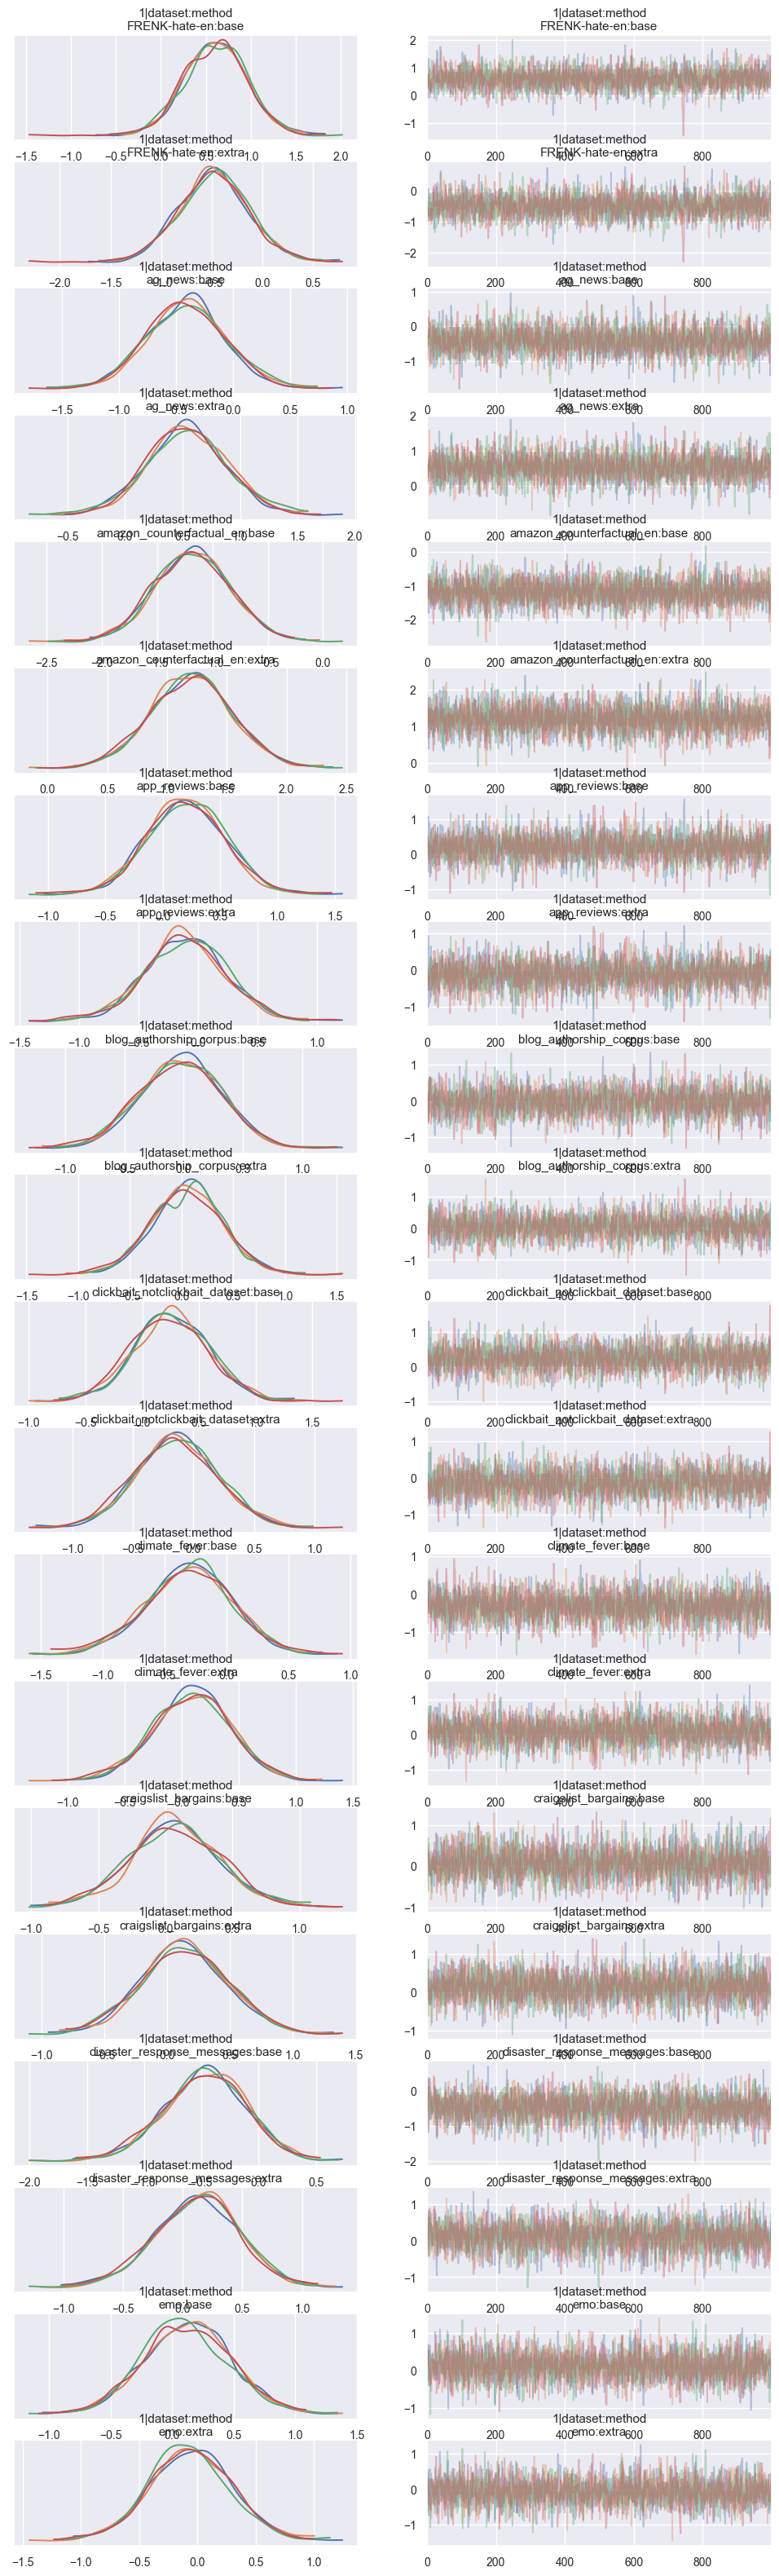

In [11]:
model_boost, summary_boost, az_summary_boost = utils.fit_model(
    num_correct_df,
    treatment="extra",
    control="base",
    equation=equation,
    id_vars=id_vars,
)

In [12]:
print(model_boost)

       Formula: p(num_correct, num_test) ~ method + (1|dataset/method) + (1|dataset/pair)
        Family: binomial
          Link: p = logit
  Observations: 1000
        Priors: 
    target = p
        Common-level effects
            Intercept ~ Normal(mu: 0.0, sigma: 1.0)
            method ~ Normal(mu: 0.0, sigma: 1.0)
        
        Group-level effects
            1|dataset ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 1.0))
            1|dataset:method ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 2.5))
            1|dataset:pair ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 1.0))
------
* To see a plot of the priors call the .plot_priors() method.
* To see a summary or plot of the posterior pass the object returned by .fit() to az.summary() or az.plot_trace()


# Evaluation bias

In [13]:
summary_bias, summary_relative_bias = utils.eda(
    accuracy_df, treatment="test", control="extra"
)

Overall difference:
┌──────────┬──────────┐
│ mean     ┆ se       │
╞══════════╪══════════╡
│ -0.00068 ┆ 0.004643 │
└──────────┴──────────┘
Overall difference (relative):
┌──────┬─────┐
│ mean ┆ se  │
╞══════╪═════╡
│ NaN  ┆ NaN │
└──────┴─────┘


In [14]:
with pl.Config(tbl_rows=-1):
    print(summary_bias)

┌────────────────────────────────┬─────────┬──────────┐
│ dataset                        ┆ mean    ┆ se       │
╞════════════════════════════════╪═════════╪══════════╡
│ FRENK-hate-en                  ┆ -0.017  ┆ 0.015306 │
│ ag_news                        ┆ 0.009   ┆ 0.017902 │
│ amazon_counterfactual_en       ┆ -0.02   ┆ 0.049926 │
│ app_reviews                    ┆ 0.03    ┆ 0.018224 │
│ blog_authorship_corpus         ┆ 0.01    ┆ 0.018425 │
│ clickbait_notclickbait_dataset ┆ -0.03   ┆ 0.033166 │
│ climate_fever                  ┆ 0.012   ┆ 0.012303 │
│ craigslist_bargains            ┆ -0.028  ┆ 0.052413 │
│ disaster_response_messages     ┆ 0.0355  ┆ 0.047509 │
│ emo                            ┆ -0.0095 ┆ 0.042299 │
│ emotion                        ┆ -0.005  ┆ 0.02092  │
│ enron_spam                     ┆ 0.0085  ┆ 0.029292 │
│ financial_phrasebank           ┆ 0.024   ┆ 0.058063 │
│ hyperpartisan_news_detection   ┆ 0.0175  ┆ 0.010806 │
│ limit                          ┆ -0.0395 ┆ 0.0

In [15]:
with pl.Config(tbl_rows=-1):
    print(summary_relative_bias)

┌────────────────────────────────┬───────────┬──────────┐
│ dataset                        ┆ mean      ┆ se       │
╞════════════════════════════════╪═══════════╪══════════╡
│ FRENK-hate-en                  ┆ -0.020634 ┆ 0.023236 │
│ ag_news                        ┆ 0.014925  ┆ 0.024327 │
│ amazon_counterfactual_en       ┆ 0.047671  ┆ 0.120973 │
│ app_reviews                    ┆ 0.0565    ┆ 0.02973  │
│ blog_authorship_corpus         ┆ 0.024759  ┆ 0.032074 │
│ clickbait_notclickbait_dataset ┆ -0.027509 ┆ 0.061839 │
│ climate_fever                  ┆ 0.092784  ┆ 0.070751 │
│ craigslist_bargains            ┆ 0.078606  ┆ 0.15066  │
│ disaster_response_messages     ┆ 0.623115  ┆ 0.293952 │
│ emo                            ┆ 0.047361  ┆ 0.079218 │
│ emotion                        ┆ 0.011137  ┆ 0.054455 │
│ enron_spam                     ┆ 0.040498  ┆ 0.04897  │
│ financial_phrasebank           ┆ 0.184317  ┆ 0.139408 │
│ hyperpartisan_news_detection   ┆ 0.037011  ┆ 0.021016 │
│ limit       

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (4 chains in 1 job)
NUTS: [Intercept, method, 1|dataset_sigma, 1|dataset_offset, 1|dataset:method_sigma, 1|dataset:method_offset, 1|dataset:pair_sigma, 1|dataset:pair_offset]


Output()

Output()

Output()

Output()

Sampling 4 chains for 500 tune and 1_000 draw iterations (2_000 + 4_000 draws total) took 173 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
/Users/kdubey/Envs/pretrain/lib/python3.11/site-packages/bambi/models.py:858: FutureWarning: 'pps' has been replaced by 'response' and is not going to work in the future
  warnings.warn(


Sampling posterior predictive. This will take at least 30 min. This issue tracks a progress bar feature: https://github.com/bambinos/bambi/issues/818


,mean,sd,hdi_5.5%,hdi_94.5%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
1|dataset:method[FRENK-hate-en:extra],0.02655,0.06655,-0.07501,0.13533,0.00087,0.00093,5852.70662,3140.70479,0.99990
1|dataset:method[FRENK-hate-en:test],-0.02365,0.06597,-0.12161,0.08813,0.00088,0.00089,5643.99834,3174.31561,1.00023
1|dataset:method[ag_news:extra],-0.01352,0.07045,-0.12401,0.10010,0.00083,0.00110,7165.89134,3147.36508,1.00008
1|dataset:method[ag_news:test],0.02108,0.07046,-0.08792,0.13554,0.00087,0.00106,6643.24334,3006.48554,1.00017
1|dataset:method[amazon_counterfactual_en:extra],0.04921,0.07109,-0.06976,0.15450,0.00090,0.00091,6334.44794,3454.96487,1.00256
1|dataset:method[amazon_counterfactual_en:test],-0.04167,0.07151,-0.15165,0.07387,0.00085,0.00093,7138.57492,3259.12944,1.00001
1|dataset:method[app_reviews:extra],-0.04962,0.06824,-0.16348,0.05198,0.00092,0.00098,5515.66846,3000.29396,1.00061
1|dataset:method[app_reviews:test],0.05024,0.06838,-0.06152,0.15483,0.00090,0.00094,5878.39306,3188.23480,1.00007
1|dataset:method[blog_authorship_corpus:extra],-0.01476,0.06755,-0.11717,0.09608,0.00080,0.00096,7049.08338,3532.86367,0.99977
1|dataset:method[blog_authorship_corpus:test],0.01726,0.06687,-0.08368,0.12884,0.00082,0.00093,6633.14646,3683.30958,0.99983


/Users/kdubey/Envs/pretrain/lib/python3.11/site-packages/arviz/plots/traceplot.py:223: UserWarning: rcParams['plot.max_subplots'] (20) is smaller than the number of variables to plot (52), generating only 20 plots
  warnings.warn(


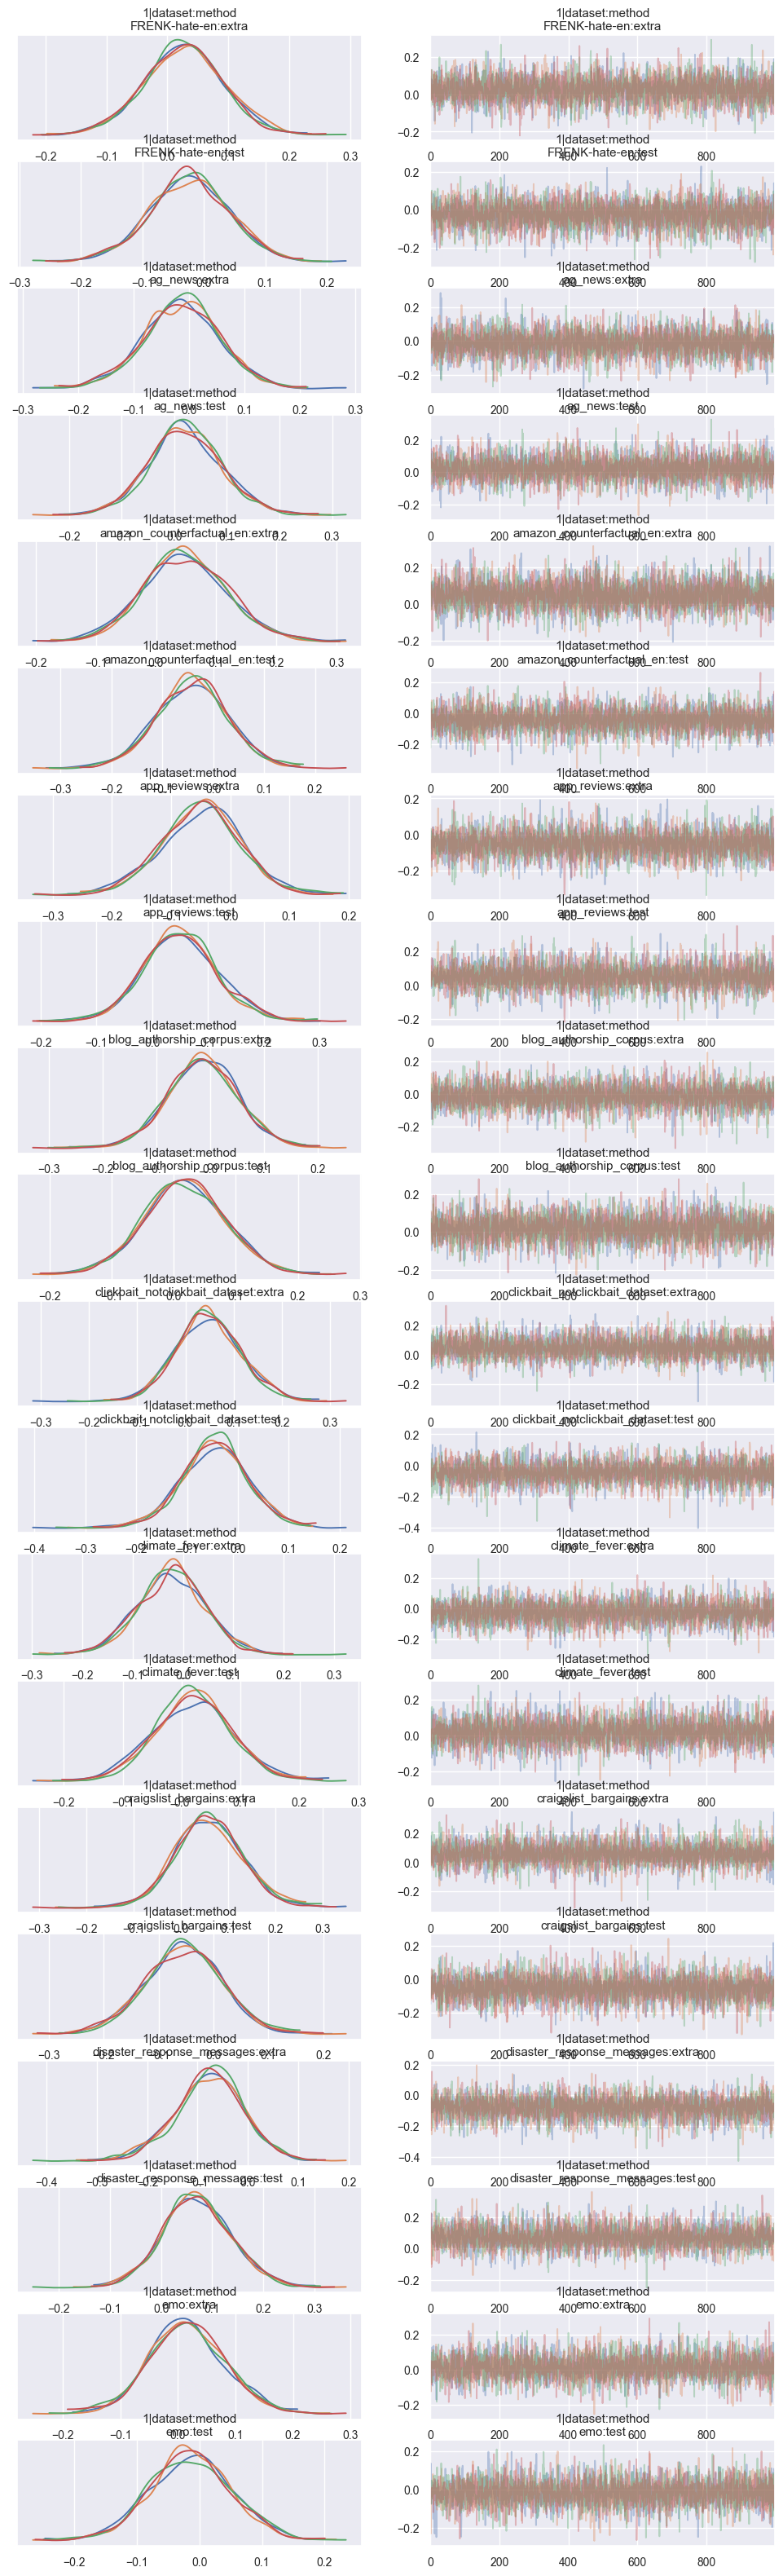

In [16]:
model_bias, summary_bias, az_summary_bias = utils.fit_model(
    num_correct_df,
    treatment="test",
    control="extra",
    equation=equation,
    id_vars=id_vars,
)

In [17]:
print(model_bias)

       Formula: p(num_correct, num_test) ~ method + (1|dataset/method) + (1|dataset/pair)
        Family: binomial
          Link: p = logit
  Observations: 1000
        Priors: 
    target = p
        Common-level effects
            Intercept ~ Normal(mu: 0.0, sigma: 1.0)
            method ~ Normal(mu: 0.0, sigma: 1.0)
        
        Group-level effects
            1|dataset ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 1.0))
            1|dataset:method ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 2.5))
            1|dataset:pair ~ Normal(mu: 0.0, sigma: HalfNormal(sigma: 1.0))
------
* To see a plot of the priors call the .plot_priors() method.
* To see a summary or plot of the posterior pass the object returned by .fit() to az.summary() or az.plot_trace()


# Write inference data

In [18]:
netcdfs = os.path.join("..", "..", "netcdfs", "zero-shot-packing", f"m{num_train}")
if not os.path.exists(netcdfs):
    os.makedirs(netcdfs)

In [19]:
summary_boost.to_netcdf(
    filename=os.path.join(netcdfs, f"main_m{num_train}_n{num_test}_boost.nc")
)

'../../netcdfs/zero-shot-packing/m100/main_m100_n100_boost.nc'

In [20]:
summary_bias.to_netcdf(
    filename=os.path.join(netcdfs, f"main_m{num_train}_n{num_test}_bias.nc")
)

'../../netcdfs/zero-shot-packing/m100/main_m100_n100_bias.nc'